***
# `Project:` Prevendo a <font color='blue'>morte</font> ou <font color='blue'>vida</font> de pacientes com hepatite

## `Date:` fevereiro, 2022

## `Data Scientist:` Walter Trevisan
***

<a name='notebook-header'></a>
## `Modelagem Preditiva` (*`Machine Learning`*) - [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Neste **notebook** vamos realizar a **modelagem preditiva** treinando e analisando alguns modelos preditivos criados com o algoritmo de **Regressão Logística**. Para fazermos o treinamento dos modelos utilizaremos os *data sets* de treino e para avaliarmos a performance dos modelos utilizaremos o *data set* de teste que foram criados e preparados na etapa anterior (`Data Munging`).

### Conteúdo
1. [Setup Inicial](#initial-setup)

2. [Carregar os *dataframes* de treino e de teste](#load-data)

3. [Analisar as premissas para a Regressão Logística](#premissas-LR)

4. [Treinar e Avaliar os modelos preditivos](#modelos-treinar-avaliar)

5. [Trabalhando com **seleção de variáveis** nos melhores modelos preditivos](#modelos-selecao-variaveis)

6. [Trabalhando com **otimização de hiperparâmetros** nos melhores modelos preditivos](#modelos-otimizacao-hiperparametros)

7. [Concluir e salvar o **melhor modelo preditivo** construído com a **Regressão Logística**](#modelos-conclusao)

___
<a name='initial-setup'></a>
## <font color='blue'>1- Setup Inicial:</font>

Primeiro, vamos carregar os **pacotes e funções** que serão utilizadas neste **notebook**.

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Importa função para verificarmos a versão da linguagem python:
from platform import python_version

# Importando os pacote NumPy:
import numpy as np
# Importando os pacote Pandas:
import pandas as pd

# Importando pacotes para visualização de gráficos:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Importa o pacote "seaborn" para criarmos gráficos estatísticos:
import seaborn as sns
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

# Machine Learning imports
# Importando o pacote do Scikit-Learn:
import sklearn as skl
# Função para padronização de variáveis:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Importando algoritmos de classificação:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

# Definindo uma "semente" para reproduzir os mesmos dados nas tarefas de amostragem,
# balanceamento dos dados e treinamento dos modelos preditivos:
SEED = 42

# Nota: Como vamos equilibrar nossos dados de treinamento, através do "balanceamento" de classes,
# vamos definir nosso limite (threshold) em "0.5" para rotular uma amostra prevista como positiva.
# Portanto, as probabilidades previstas acima deste valor (THRESHOLD) serão rotuladas como positiva
# (target=1), ou seja, significa que os pacientes com hepatite sobreviveram (LIVE).
THRESHOLD = 0.5

# Define valor para "Cross Validation" (Número de 'folds'):
NUM_FOLDS=10 # Número de passadas ("folds")

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Gráficos, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
ROOT_DIR = "."

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
OBJ_PATH = os.path.join(ROOT_DIR, "objects")
# Criando o diretório, se ele não existir:
os.makedirs(OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "objetos" (Data Frames) do Projeto:
DATA_PATH = os.path.join(ROOT_DIR, "data")
# Criando o diretório, se ele não existir:
os.makedirs(DATA_PATH, exist_ok=True)

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) do Projeto:
GRAPHICS_PATH = os.path.join(ROOT_DIR, "images", "graphics")
# Criando o diretório, se ele não existir:
os.makedirs(GRAPHICS_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Modelos Preditivos" (Machine Learning) relacionados ao Projeto:
ML_PATH = os.path.join(ROOT_DIR, "models")
# Criando o diretório, se ele não existir:
os.makedirs(ML_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
LIB_PATH = os.path.join(ROOT_DIR, "library")

# Adicionando o diretório "./library" ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "data_science_library.py":
import data_science_library as dslib

# Importando para este notebook, as classes e funções definidas no módulo "plot_library.py":
import plot_library as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "project_library.py":
import project_library as pjlib

# Importando para este notebook, as classes e funções definidas no módulo "machine_learning_library.py":
import machine_learning_library as mllib

# Criando um objeto para calularmos os tempos gastos de treinamento:
ept = dslib.ElapsedTime(builder_msg=False)

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
print("Versões dos pacotes usados neste jupyter notebook:")
print("Python      : {}".format(python_version()))
print("Numpy       : {}".format(np.__version__))
print("Pandas      : {}".format(pd.__version__))
print("Matplotlib  : {}".format(mpl.__version__))
print("Seaborn     : {}".format(sns.__version__))
print("Scikit-Learn: {}".format(skl.__version__))

Versões dos pacotes usados neste jupyter notebook:
Python      : 3.8.12
Numpy       : 1.19.5
Pandas      : 1.3.5
Matplotlib  : 3.4.3
Seaborn     : 0.11.2
Scikit-Learn: 1.0.2


___
<a name='load-data'></a>
## <font color='blue'>2- Carregar os *data frames* de `treino` e `teste`</font>

### Dados de Treino:

* `train_set_v1`: nesta versão apenas apliquei **encoding** nas variáveis categóricas;

* `train_set_v2`: nesta versão também apliquei **encoding** nas variáveis categóricas; e tratei e **removi os outliers univariados** existentes nas variáveis numéricas.

In [3]:
# Criando um objeto para armazenar as versões dos dataframes de treino:
train_set = {}

In [4]:
# Carregando o dataframe de treino "train_set_v1":
train_set['v1'] = dslib.pickle_object_load(path=DATA_PATH, file="train_set_v1.pkl")
# Carregando o dataframe de treino "train_set_v2":
train_set['v2'] = dslib.pickle_object_load(path=DATA_PATH, file="train_set_v2.pkl")

### Dados de Teste:

* `test_set`: tratei os valores ausentes nas variáveis categóricas e numéricas; apliquei **encoding** nas variáveis categóricas.

In [5]:
# Carregando o dataframe de teste "test_set":
test_set = dslib.pickle_object_load(path=DATA_PATH, file="test_set.pkl")

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)**.

___
<a name='premissas-LR'></a>
## <font color='blue'>3- Premissas para a Regressão Logística</font>

Antes de criarmos um modelo preditivo com o algoritmo de **regressão logística**, precisamos analisar e verificar se as **6 premissas** são satisfeitas. Quando as premissas da análise de regressão logística não são atendidas (satisfeitas), problemas como estimativas de coeficientes tendenciosos ou erros padrão muito grandes para os coeficientes de regressão logística podem levar a inferências estatísticas inválidas.

### Conteúdo:
[3.1- Premissa 1: Tipo de resultado apropriado](#premissa-resultado)

[3.2- Premissa 2: Sem outliers fortemente influentes](#premissa-outliers)

[3.3- Premissa 3: Linearidade de variáveis independentes e log odds](#premissa-linearidade)

[3.4- Premissa 4: Ausência de multicolinearidade](#premissa-multicolinearidade)

[3.5- Premissa 5: Independência de observações](#premissa-independencia)

[3.6- Premissa 6: Tamanho do *data set* (amostra) suficientemente grande](#premissa-tamanho)

*Nota: para analisarmos as premissas vamos utilizar as duas versões dos dados de treino: `v1` e `v2` porque na segunda versão foi feito o tratamento dos outliers univariados*.

### Dados de treino: `v1`

In [6]:
# Define as variáveis independentes e dependente (target):
X_cols_v1 = train_set['v1'].columns.to_list()[1:]
X_v1 = train_set['v1'][X_cols_v1]
y_v1 = train_set['v1']['Class']

# Adiciona uma "constante":
X_constant_v1 = sm.add_constant(X_v1, prepend=False)
X_constant_v1.head()

,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,const
0,0,0,1,0,0,1,1,0,1,0,0,0,1,48.0,48.0,123.0,157.0,27.0,31.00,1.0
1,0,0,0,1,1,1,0,0,1,1,1,1,0,39.0,13.0,78.0,30.0,44.0,85.00,1.0
2,1,0,1,0,0,0,0,0,0,0,1,1,0,20.0,23.0,150.0,68.0,39.0,64.71,1.0
3,1,0,0,1,1,1,1,0,1,1,1,1,0,34.0,6.0,30.0,24.0,40.0,76.00,1.0
4,1,1,1,0,1,1,1,0,1,0,1,1,0,58.0,14.0,175.0,55.0,27.0,36.00,1.0


### Dados de treino: `v2`

In [7]:
# Define as variáveis independentes e dependente (target):
X_cols_v2 = train_set['v2'].columns.to_list()[1:]
X_v2 = train_set['v2'][X_cols_v2]
y_v2 = train_set['v2']['Class']

# Adiciona uma "constante":
X_constant_v2 = sm.add_constant(X_v2, prepend=False)
X_constant_v2.head()

,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,const
0,0,0,1,0,0,1,1,0,1,0,0,0,1,48.0,14.15,123.0,157.0,27.0,31.00,1.0
1,0,0,0,1,1,1,0,0,1,1,1,1,0,39.0,13.00,78.0,30.0,44.0,85.00,1.0
2,1,0,1,0,0,0,0,0,0,0,1,1,0,20.0,23.00,150.0,68.0,39.0,64.71,1.0
3,1,0,0,1,1,1,1,0,1,1,1,1,0,34.0,6.00,30.0,24.0,40.0,76.00,1.0
4,1,1,1,0,1,1,1,0,1,0,1,1,0,58.0,14.00,175.0,55.0,27.0,36.00,1.0


___
<a name='premissa-resultado'></a>
## <font color='blue'>3.1- Premissa 1: Tipo de resultado apropriado</font>

A regressão logística geralmente funciona como um classificador, portanto o tipo de regressão logística utilizada (binária, multinomial ou ordinal) deve corresponder à variável de resultado (dependente) no conjunto de dados.

Por padrão, a regressão logística assume que a variável de resultado é **binária**, onde o número de resultados possíveis são dois valores (por exemplo, Sim/Não).

Se a variável dependente tiver três ou mais resultados, então a regressão logística **multinomial ou ordinal** deverá ser utilizada.

#### ***Como podemos checar?***

Podemos verificar esta premissa, obtendo o número de resultados diferentes na variável dependente. Se quisermos usar a regressão logística **binária**, então deverá haver apenas **dois** resultados únicos na variável de resultado (dependente).

### Dados de treino: `v1`

In [8]:
# Verificando a contagem de valores da variável dependente (target):
y_v1.value_counts()

1    97
0    26
Name: Class, dtype: int64

### Dados de treino: `v2`

In [9]:
# Verificando a contagem de valores da variável dependente (target):
y_v2.value_counts()

1    97
0    26
Name: Class, dtype: int64

**Análise:**
- Há apenas **dois** resultados, ou seja, temos uma classificação binária de pacientes com hepatite que morreram (0) ou que sobreviveram (1); então, usaremos a **Regressão Logística Binária** (que é o método padrão utilizado quando especificamos família=Binomial em nossos modelos logit);
- Outros tipos de Regressão Logística (onde os resultados > 2) incluem:
    - Regressão Logística Multinomial: A variável alvo tem três ou mais categorias nominais, como por exemplo a previsão do tipo de vinho;
    - Regressão Logística Ordinal: A variável alvo tem três ou mais categorias ordinais, como por exemplo a classificação de produtos de 1 a 5.

Portanto, esta **premissa foi satisfeita (atendida)** nas duas versões dos dados de treino!

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)** ou então retorne para **[3- Premissas para Regressão Logística](#premissas-LR)**.

___
<a name='premissa-outliers'></a>
## <font color='blue'>3.2- Premissa 2: Sem outliers fortemente influentes</font>

A regressão logística pressupõe que **não** há pontos de dados outliers altamente influentes, pois distorcem o resultado e a precisão do modelo.

Note que nem todos os outliers são observações influentes. Ao contrário, os outliers têm o **potencial** de ser influentes. Para avaliar esta premissa, precisamos verificar se ambos os critérios são satisfeitos, ou seja, influentes **e** outliers.

#### ***Como podemos checar?***

***(i) Influência***

Nós podemos usar a **Distância de Cook** para determinar a **influência** de um ponto de dados, e ela é calculada com base em seu **residuo e alavancagem**. Ela resume as mudanças no modelo de regressão quando essa (i-ésima) observação em particular é removida.

Há diferentes opiniões a respeito dos valores de corte a serem utilizados. Um threshold padrão é **4/N** (onde N = número de observações), o que significa que observações com **Distância de Cook > 4/N** são consideradas como **influentes**.

O pacote do `statsmodel` também nos permite visualizar gráficos de influência para GLMs, como o gráfico de índice (`influence.plot_index`) para atributos de influência.

***(ii) Outliers***

Nós utilizamos os **resíduos padronizados** para determinar se um ponto de dados é um outlier ou não. Os pontos de dados com **valores residuais padronizados absolutos superiores a 3** representam possíveis outliers extremos.

***(iii) Colocando as duas premissas juntas***

Nós podemos identificar os pontos de dados **outliers fortemente influentes** encontrando as observações *top* com base nos thresholds definidos anteriormente para a Distância de Cook e resíduos padronizados.

Quando os outliers são detectados, eles devem ser tratados de acordo, ou seja, eles podem ser removidos ou transformados.

**Resumindo:**
- Os valores influentes são pontos de dados individuais extremos que podem alterar a qualidade do modelo de regressão logística.
- A distância de Cook é uma estimativa da influência de um ponto de dados. Ela leva em conta tanto a alavancagem quanto o residual de cada observação. A Distância de Cook é um resumo de quanto um modelo de regressão muda quando a **i-ésima** observação é removida.
- Uma regra geral é que qualquer observação com uma distância de Cook maior que 4/N (onde N = número total de observações) é considerada influente (outras informações podem ser encontradas **[aqui](https://www.statology.org/cooks-distance-python/)** e **[aqui](https://www.scikit-yb.org/en/latest/api/regressor/influence.html?highlight=cook#module-yellowbrick.regressor.influence)**), embora existam valores de corte ainda mais genéricos de >0.5-1.0.
- Para os outliers, podemos usar os resíduos absolutamente padronizados para identificá-los (**std resid > 3**).
- Referência: **[aqui](https://www.statsmodels.org/dev/examples/notebooks/generated/influence_glm_logit.html)**.

### Dados de treino: `v1`

In [10]:
# Usamos aqui o método GLM para "Logistic Regression", para que possamos recuperar as medidas de influência:
logit_model = GLM(y_v1, X_constant_v1, family=families.Binomial())
# Fazemos o "fit" nos dados:
logit_results = logit_model.fit()
# Mostramos um resumo do modelo:
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  123
Model:                            GLM   Df Residuals:                      103
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25.176
Date:                Fri, 11 Feb 2022   Deviance:                       50.353
Time:                        11:38:47   Pearson chi2:                     122.
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4632
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender            24.2263   1.43e+04      0.

In [11]:
# Obtendo as medidas de influência:
influence = logit_results.get_influence()

# Criando um dataframe do sumário das medidas de influência:
summ_df = influence.summary_frame()

# Filtramos no dataframe do sumário a "Distância de Cook",
# criando um outro dataframe chamados diagnóstico:
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Anexamos ao dataframe os valores absolutos dos resíduos padronizados:
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Ordenamos o dataframe pela "Distância de Cook":
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df

,cooks_d,std_resid
0,4.326586e-09,0.019703
1,3.541841e-08,0.046306
2,4.440487e-21,0.029329
3,4.256012e-19,0.029330
4,5.674277e-11,0.029358
...,...,...
118,1.230035e-23,0.029329
119,1.584081e-02,0.557067
120,4.850860e-07,0.063425
121,1.672901e-06,0.076665


In [12]:
# Definimos o "threshold" para a "Distância de Cook":
cook_threshold = 4 / len(X_constant_v1)
print(f"Threshold para a Distância de Cook = {cook_threshold}")

Threshold para a Distância de Cook = 0.032520325203252036


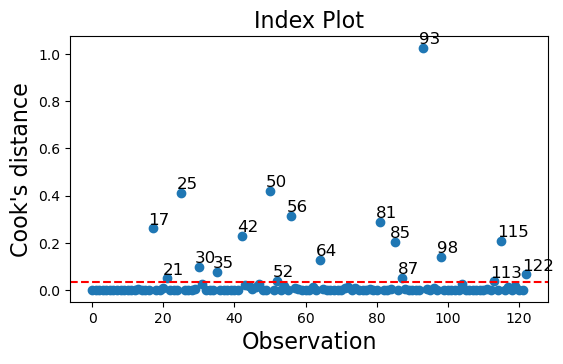

In [13]:
# Gráfico das medidas influentes (Distância de Cook):
# Definindo o estilo do gráfico:
plt.style.use(style='default')
# Definindo a figura o o subplot onde será plotado o gráfico:
fig, ax = plt.subplots(figsize=(6, 4))
# Plot
influence.plot_index(y_var="cooks", threshold=cook_threshold, ax=ax)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [14]:
# Encontrar o número de observações que excedam o threshold da "Distância de Cook":
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(X_constant_v1)),1)
print(f'Proporção de pontos de dados que são altamente influentes = {prop_outliers}%')

Proporção de pontos de dados que são altamente influentes = 14.6%


In [15]:
# Encontrar o número de observações que são AMBAS outliers (std dev > 3) e altamente influentes:
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(X_constant_v1)),1)
print(f'Proporção de outliers altamente influentes = {prop_extreme}%')

Proporção de outliers altamente influentes = 0.8%


In [16]:
# Mostrar os "top 5" outliers altamente influentes:
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
42,0.22888,9.418954


In [17]:
# Análise detalhada da observação do índice 42 (outlier extremo):
X_constant_v1.iloc[42]

Gender              0.0
Steroid             0.0
Antivirals          1.0
Fatigue             1.0
Malaise             1.0
Anorexia            1.0
LiverBig            1.0
LiverFirm           0.0
SpleenPalpable      1.0
Spiders             1.0
Ascites             1.0
Varices             1.0
Histology           1.0
Age                38.0
Bilirubin           4.0
AlkPhosphate      243.0
SGOT               49.0
Albumin            38.0
Protime            90.0
const               1.0
Name: 42, dtype: float64

In [18]:
y_v1.iloc[42] # 0 = paciente com hepatite morreu.

0

**Análise:**
- É importante notarmos que para *pontos de dados* com distâncias de Cook relativamente altas, **não** significam, automaticamente, que eles devem ser imediatamente removidos do conjunto de dados. Eles são, essencialmente, um indicador para destacar quais pontos de dados merecem ser aprofundados, para entender se são verdadeiras anomalias ou não.
- Na prática, uma avaliação de valores "grandes" é um *julgamento* que deve ser feito com base na experiência e no conjunto particular de dados que estão sendo analisados.
- Além disso, com base em nosso threshold pré-definido (4/N), temos que **14.6% (18/122)** dos pontos de dados estão na zona de outliers, ou seja, temos um número significativo de pontos de dados classificados como outliers. Portanto, neste caso, a melhor estratégia seria transformá-los.
- Também observamos, que temos apenas **1 outlier** classificado como **altamente influente**, de acordo com as duas condições: `std dev > 3` e `Distância de Cook > 4/N`. Neste caso, a melhor estratégia seria removê-lo do conjunto de dados.

### Removendo os *outliers* altamente influentes:

In [19]:
# Removendo o outlier extremo:
# Variáveis independentes:
X_constant_v1.drop(index=extreme.index.to_list(), inplace=True)
X_constant_v1.reset_index(drop=True, inplace=True)
# Variável dependente (target):
y_v1.drop(index=extreme.index.to_list(), inplace=True)
y_v1.reset_index(drop=True, inplace=True)

In [20]:
# Removendo o outlier extremo dos dados originais:
train_set['v1'].drop(index=extreme.index.to_list(), inplace=True)
train_set['v1'].reset_index(drop=True, inplace=True)

### Dados de treino: `v2`

In [21]:
# Usamos aqui o método GLM para "Logistic Regression", para que possamos recuperar as medidas de influência:
logit_model = GLM(y_v2, X_constant_v2, family=families.Binomial())
# Fazemos o "fit" nos dados:
logit_results = logit_model.fit()
# Mostramos um resumo do modelo:
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  123
Model:                            GLM   Df Residuals:                      103
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.370
Date:                Fri, 11 Feb 2022   Deviance:                       46.741
Time:                        11:38:49   Pearson chi2:                     763.
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4788
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender            22.9395    1.5e+04      0.

In [22]:
# Obtendo as medidas de influência:
influence = logit_results.get_influence()

# Criando um dataframe do sumário das medidas de influência:
summ_df = influence.summary_frame()

# Filtramos no dataframe do sumário a "Distância de Cook",
# criando um outro dataframe chamados diagnóstico:
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Anexamos ao dataframe os valores absolutos dos resíduos padronizados:
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Ordenamos o dataframe pela "Distância de Cook":
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df

,cooks_d,std_resid
0,5.298582e-09,0.067657
1,8.186944e-07,0.087138
2,1.797078e-17,0.071886
3,4.094591e-17,0.071886
4,6.099139e-14,0.071888
...,...,...
118,1.975212e-19,0.071885
119,3.494063e-04,0.008468
120,8.245053e-05,0.125274
121,7.141555e-04,0.163686


In [23]:
# Definimos o "threshold" para a "Distância de Cook":
cook_threshold = 4 / len(X_constant_v2)
print(f"Threshold para a Distância de Cook = {cook_threshold}")

Threshold para a Distância de Cook = 0.032520325203252036


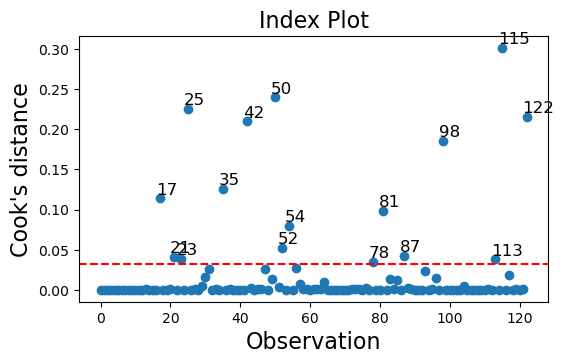

In [24]:
# Gráfico das medidas influentes (Distância de Cook):
# Definindo o estilo do gráfico:
plt.style.use(style='default')
# Definindo a figura o o subplot onde será plotado o gráfico:
fig, ax = plt.subplots(figsize=(6, 4))
# Plot
influence.plot_index(y_var="cooks", threshold=cook_threshold, ax=ax)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [25]:
# Encontrar o número de observações que excedam o threshold da "Distância de Cook":
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(X_constant_v2)),1)
print(f'Proporção de pontos de dados que são altamente influentes = {prop_outliers}%')

Proporção de pontos de dados que são altamente influentes = 13.0%


In [26]:
# Encontrar o número de observações que são AMBAS outliers (std dev > 3) e altamente influentes:
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(X_constant_v2)),1)
print(f'Proporção de outliers altamente influentes = {prop_extreme}%')

Proporção de outliers altamente influentes = 0.8%


In [27]:
# Mostrar os "top 5" outliers altamente influentes:
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
42,0.209997,10.805424


In [28]:
# Análise detalhada da observação do índice 42 (outlier extremo):
X_constant_v2.iloc[42]

Gender             0.000
Steroid            0.000
Antivirals         1.000
Fatigue            1.000
Malaise            1.000
Anorexia           1.000
LiverBig           1.000
LiverFirm          0.000
SpleenPalpable     1.000
Spiders            1.000
Ascites            1.000
Varices            1.000
Histology          1.000
Age               38.000
Bilirubin          4.000
AlkPhosphate      94.579
SGOT              49.000
Albumin           38.000
Protime           90.000
const              1.000
Name: 42, dtype: float64

In [29]:
y_v2.iloc[42] # 0 = paciente com hepatite morreu.

0

**Análise:**
- É importante notarmos que para *pontos de dados* com distâncias de Cook relativamente altas, **não** significam, automaticamente, que eles devem ser imediatamente removidos do conjunto de dados. Eles são, essencialmente, um indicador para destacar quais pontos de dados merecem ser aprofundados, para entender se são verdadeiras anomalias ou não.
- Na prática, uma avaliação de valores "grandes" é um *julgamento* que deve ser feito com base na experiência e no conjunto particular de dados que estão sendo analisados.
- Além disso, com base em nosso threshold pré-definido (4/N), temos que **13% (16/122)** dos pontos de dados estão na zona de outliers, ou seja, temos um número significativo de pontos de dados classificados como outliers. Portanto, neste caso, a melhor estratégia seria transformá-los.
- Também observamos, que temos apenas **1 outlier** classificado como **altamente influente**, de acordo com as duas condições: `std dev > 3` e `Distância de Cook > 4/N`. Neste caso, a melhor estratégia seria removê-lo do conjunto de dados.

### Removendo os *outliers* altamente influentes:

In [30]:
# Removendo o outlier extremo:
# Variáveis independentes:
X_constant_v2.drop(index=extreme.index.to_list(), inplace=True)
X_constant_v2.reset_index(drop=True, inplace=True)
# Variável dependente (target):
y_v2.drop(index=extreme.index.to_list(), inplace=True)
y_v2.reset_index(drop=True, inplace=True)

In [31]:
# Removendo o outlier extremo dos dados originais:
train_set['v2'].drop(index=extreme.index.to_list(), inplace=True)
train_set['v2'].reset_index(drop=True, inplace=True)

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)** ou então retorne para **[3- Premissas para Regressão Logística](#premissas-LR)**.

___
<a name='premissa-linearidade'></a>
## <font color='blue'>3.3- Premissa 3: Linearidade de variáveis independentes e log odds</font>

Uma das premissas críticas da regressão logística é que a relação entre o **logit** (também conhecido como **log-odds**) do resultado e cada variável independente **contínua** deverá ser **linear**.

O **logit** é o logaritmo do **odds ratio**, onde ***p*** = probabilidade de um resultado positivo (por exemplo, paciente com hepatite sobreviveu a doença).

#### Fórmula: logit(***p***) = log(***p***/(1 - ***p***))

#### ***Como podemos checar?***

***(i) Teste Box-Tidwell***

O **teste Box-Tidwell** é usado para verificar a linearidade entre os preditores e o logit. Isto é feito adicionando no modelo **termos de interação** log-transformados entre as variáveis **independentes contínuas** e seu correspondente **log natural** no modelo.

Por exemplo, se uma de suas variáveis independentes contínuas for **`Age`**, então o termo de interação a ser adicionado como uma nova variável será **`Age * log(Age)`**.

Como parte do teste Box-Tidwell, nós filtramos nosso conjunto de dados para manter apenas as variáveis independentes contínuas.

**Teste Box-Tidwell:**
- Uma das premissas importantes da regressão logística é a linearidade do logit sobre as variáveis explicativas contínuas. Esta premissa significa que os relacionamentos entre os preditores contínuos e o logit (log odds) deverá ser linear;
- A **transformação Box-Tidwell (teste)** pode ser usada para testar a linearidade na premissa logit ao executar a regressão logística;
- Ela verifica se a transformação logit é uma função linear do preditor, adicionando efetivamente a transformação não linear do preditor original como um termo de interação para testar se esta adição não fez melhor previsão;
- Um p-value **estatisticamente significante** do termo de interação na transformação Box-Tidwell significa que a suposição de linearidade é violada;
- Se uma variável for realmente encontrada como não-linear, então podemos resolvê-la incorporando termos polinomiais de ordem superior para aquela variável na análise de regressão para capturar a não-linearidade (por exemplo, x^2). Uma outra solução possível para este problema é a categorização das variáveis independentes contínuas, ou seja, transformar as variáveis de medida (contínuas) para o nível ordinal e depois incluí-las no modelo.

### Dados de treino: `v1`

In [32]:
# O Box Tidwell trabalha somente para valores positivos.
# Portanto, vamos remover os valores onde "x = 0" apenas para as variáveis independentes contínuas:
df_train = train_set['v1'].drop(train_set['v1'][train_set['v1'].Age == 0].index)
df_train = df_train.drop(df_train[df_train.Bilirubin == 0].index)
df_train = df_train.drop(df_train[df_train.AlkPhosphate == 0].index)
df_train = df_train.drop(df_train[df_train.SGOT == 0].index)
df_train = df_train.drop(df_train[df_train.Albumin == 0].index)
df_train = df_train.drop(df_train[df_train.Protime == 0].index)

In [33]:
# Shape:
print(f"Shape: {df_train.shape}")
# Visualizando os primeiros registros:
df_train.head()

Shape: (122, 20)


,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,48.0,48.0,123.0,157.0,27.0,31.00
1,1,0,0,0,1,1,1,0,0,1,1,1,1,0,39.0,13.0,78.0,30.0,44.0,85.00
2,1,1,0,1,0,0,0,0,0,0,0,1,1,0,20.0,23.0,150.0,68.0,39.0,64.71
3,1,1,0,0,1,1,1,1,0,1,1,1,1,0,34.0,6.0,30.0,24.0,40.0,76.00
4,1,1,1,1,0,1,1,1,0,1,0,1,1,0,58.0,14.0,175.0,55.0,27.0,36.00


Regressão logística com `statsmodel` - Inclusão do termo de interação (transformação logit) como parte do teste Box-Tidwell

In [34]:
df_train_lt = df_train.copy(deep=True)  # lt = logit transform (transformação logit).

# Define as variáveis contínuas:
continuous_var = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']

# Adicionar os termos de interação com transformação logit (log natural)
# para as variáveis contínuas. Por exemplo: Age * Log(Age)
for var in continuous_var:
    df_train_lt[f'{var}:Log_{var}'] = df_train_lt[var].apply(lambda x: x * np.log(x)) # np.log = log natural.

# Mostra as primeiras observações:
df_train_lt.head()

,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,...,AlkPhosphate,SGOT,Albumin,Protime,Age:Log_Age,Bilirubin:Log_Bilirubin,AlkPhosphate:Log_AlkPhosphate,SGOT:Log_SGOT,Albumin:Log_Albumin,Protime:Log_Protime
0,0,0,0,1,0,0,1,1,0,1,...,123.0,157.0,27.0,31.00,185.817649,185.817649,591.898676,793.830591,88.987595,106.453603
1,1,0,0,0,1,1,1,0,0,1,...,78.0,30.0,44.0,85.00,142.878904,33.344342,339.823288,102.035921,166.504344,377.625357
2,1,1,0,1,0,0,0,0,0,0,...,150.0,68.0,39.0,64.71,59.914645,72.116367,751.595294,286.926524,142.878904,269.835248
3,1,1,0,0,1,1,1,1,0,1,...,30.0,24.0,40.0,76.00,119.896258,10.750557,102.035921,76.273292,147.555178,329.135734
4,1,1,1,1,0,1,1,1,0,1,...,175.0,55.0,27.0,36.00,235.505695,36.946803,903.837545,220.403325,88.987595,129.006682


In [35]:
# Manter as colunas relacionadas às variáveis contínuas:
cols_to_keep = continuous_var + df_train_lt.columns.tolist()[-len(continuous_var):]
print(f"cols_to_keep = {cols_to_keep}")

cols_to_keep = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Age:Log_Age', 'Bilirubin:Log_Bilirubin', 'AlkPhosphate:Log_AlkPhosphate', 'SGOT:Log_SGOT', 'Albumin:Log_Albumin', 'Protime:Log_Protime']


Portanto, com os termos de interação incluídos, podemos executar novamente a regressão logística e rever os resultados:

In [36]:
# Redefine as variáveis independentes para serem incluidos os termos de interação:
X_lt = df_train_lt[cols_to_keep]
y_lt = df_train_lt['Class']

# Adiciona uma constante:
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Constrói o modelo e ajusta (fit) os dados (utilizando statsmodel's Logit):
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Mostra um resumo dos resultados:
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  122
Model:                            GLM   Df Residuals:                      109
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30.826
Date:                Fri, 11 Feb 2022   Deviance:                       61.652
Time:                        11:38:52   Pearson chi2:                     128.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3989
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Age           

**Análise:**

O que precisamos fazer é verificar a **significância estatística dos termos de interação** (por exemplo: `Age:Log_Age`) com base em seus **p-values**.

- O termo de interação `Age:Log_Age` tem um **p-value = 0.100**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Age` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `Bilirubin:Log_Bilirubin` tem um **p-value = 0.238**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Bilirubin` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `AlkPhosphate:Log_AlkPhosphate` tem um **p-value = 0.914**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `AlkPhosphate` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `SGOT:Log_SGOT` tem um **p-value = 0.803**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `SGOT` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `Albumin:Log_Albumin` tem um **p-value = 0.816**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Albumin` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `Protime:Log_Protime` tem um **p-value = 0.230**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Protime` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita.

Portanto, concluímos que esta premissa foi satisfeita para **todas as variáveis independentes contínuas**.

#### Verificação Visual

Uma outra maneira de verificarmos a linearidade logit é inspecionando visualmente o gráfico de dispersão entre cada preditor (variável independente contínua) e os valores logit (*log odds*).

In [37]:
# Executa novamente a Regressão logística no conjunto de dados original (variáveis X e y):
logit_results = GLM(y_v1, X_constant_v1, family=families.Binomial()).fit()
predicted = logit_results.predict(X_constant_v1)

# Obtem os valores log odds:
log_odds = np.log(predicted / (1 - predicted))

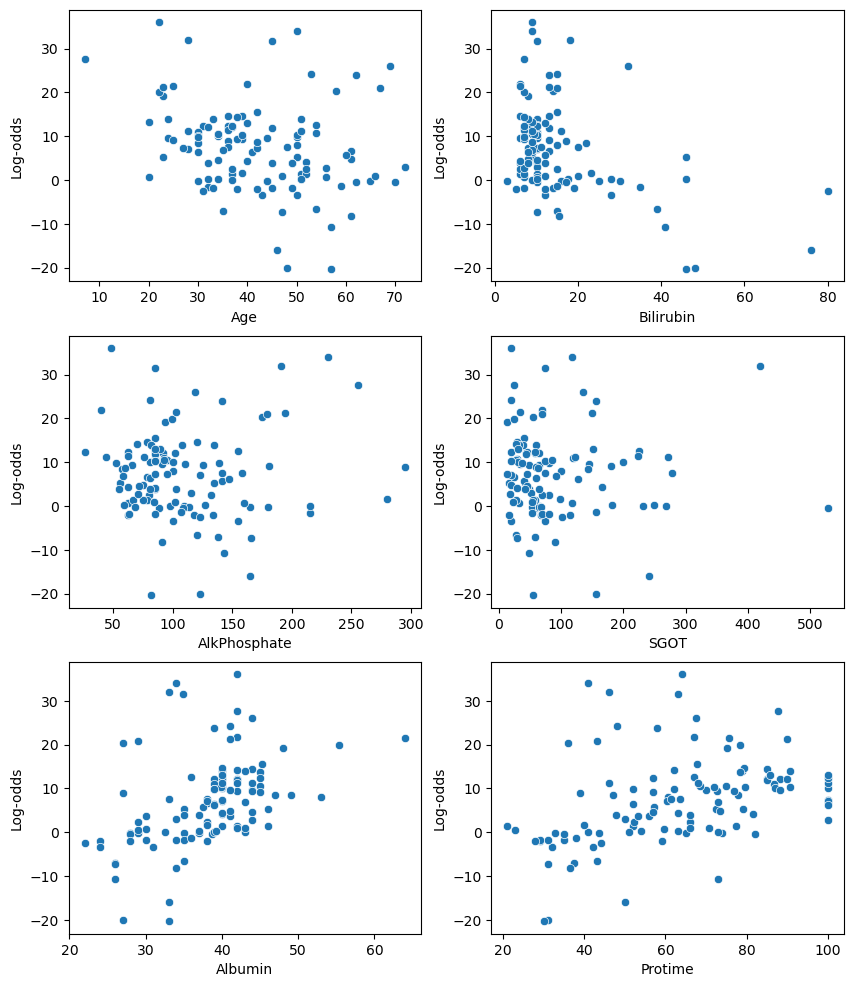

In [38]:
# Criando gráficos de dispersão para visualizar a relação entre o "preditor" vs "Valores Logit"
# para cada variável independente contínua:
# Definindo o estilo do gráfico:
plt.style.use(style='default')

# Definindo a figura onde serão plotados os gráficos:
plt.figure(figsize=(10, 12))

# "Loop for" para plotarmos os gráficos de dispersão:
for i, x_i in enumerate(continuous_var):
    # Cria o subplot:
    ax = plt.subplot(3, 2, i+1)

    # Plot do gráfico:
    sns.scatterplot(x=X_constant_v1[x_i].values, y=log_odds, ax=ax)

    # Definindo o título:
    ax.set_title(label = None, fontdict = {'fontsize': 16})

    # Definindo o label do eixo "x":
    ax.set_xlabel(xlabel = x_i, fontdict = {'fontsize': 10})

    # Definindo o label do eixo "y":
    ax.set_ylabel(ylabel = 'Log-odds', fontdict = {'fontsize': 10})

    # Definindo o tamanho dos labels dos ticks nos eixos "x" e "y":
    plt.tick_params(axis='x', which='major', labelsize=10)
    plt.tick_params(axis='y', which='major', labelsize=10)

# Ajustando os espaçamentos entre os gráficos nos subplots:
plt.subplots_adjust(wspace=None, hspace=None)

# Mostrando os gráficos:
plt.show()

# Fechando as instâncias da figura criada:
plt.close()

**Análise:** observe que os gráficos de dispersão confirman que **existe linearidade logit** para cada variável independente contínua.

### Dados de treino: `v2`

In [39]:
# O Box Tidwell trabalha somente para valores positivos.
# Portanto, vamos remover os valores onde "x = 0" apenas para as variáveis independentes contínuas:
df_train = train_set['v2'].drop(train_set['v2'][train_set['v2'].Age == 0].index)
df_train = df_train.drop(df_train[df_train.Bilirubin == 0].index)
df_train = df_train.drop(df_train[df_train.AlkPhosphate == 0].index)
df_train = df_train.drop(df_train[df_train.SGOT == 0].index)
df_train = df_train.drop(df_train[df_train.Albumin == 0].index)
df_train = df_train.drop(df_train[df_train.Protime == 0].index)

In [40]:
# Shape:
print(f"Shape: {df_train.shape}")
# Visualizando os primeiros registros:
df_train.head()

Shape: (122, 20)


,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,48.0,14.15,123.0,157.0,27.0,31.00
1,1,0,0,0,1,1,1,0,0,1,1,1,1,0,39.0,13.00,78.0,30.0,44.0,85.00
2,1,1,0,1,0,0,0,0,0,0,0,1,1,0,20.0,23.00,150.0,68.0,39.0,64.71
3,1,1,0,0,1,1,1,1,0,1,1,1,1,0,34.0,6.00,30.0,24.0,40.0,76.00
4,1,1,1,1,0,1,1,1,0,1,0,1,1,0,58.0,14.00,175.0,55.0,27.0,36.00


Regressão logística com `statsmodel` - Inclusão do termo de interação (transformação logit) como parte do teste Box-Tidwell

In [41]:
df_train_lt = df_train.copy(deep=True)  # lt = logit transform (transformação logit).

# Define as variáveis contínuas:
continuous_var = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']

# Adicionar os termos de interação com transformação logit (log natural)
# para as variáveis contínuas. Por exemplo: Age * Log(Age)
for var in continuous_var:
    df_train_lt[f'{var}:Log_{var}'] = df_train_lt[var].apply(lambda x: x * np.log(x)) # np.log = log natural.

# Mostra as primeiras observações:
df_train_lt.head()

,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,...,AlkPhosphate,SGOT,Albumin,Protime,Age:Log_Age,Bilirubin:Log_Bilirubin,AlkPhosphate:Log_AlkPhosphate,SGOT:Log_SGOT,Albumin:Log_Albumin,Protime:Log_Protime
0,0,0,0,1,0,0,1,1,0,1,...,123.0,157.0,27.0,31.00,185.817649,37.493462,591.898676,793.830591,88.987595,106.453603
1,1,0,0,0,1,1,1,0,0,1,...,78.0,30.0,44.0,85.00,142.878904,33.344342,339.823288,102.035921,166.504344,377.625357
2,1,1,0,1,0,0,0,0,0,0,...,150.0,68.0,39.0,64.71,59.914645,72.116367,751.595294,286.926524,142.878904,269.835248
3,1,1,0,0,1,1,1,1,0,1,...,30.0,24.0,40.0,76.00,119.896258,10.750557,102.035921,76.273292,147.555178,329.135734
4,1,1,1,1,0,1,1,1,0,1,...,175.0,55.0,27.0,36.00,235.505695,36.946803,903.837545,220.403325,88.987595,129.006682


In [42]:
# Manter as colunas relacionadas às variáveis contínuas:
cols_to_keep = continuous_var + df_train_lt.columns.tolist()[-len(continuous_var):]
print(f"cols_to_keep = {cols_to_keep}")

cols_to_keep = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Age:Log_Age', 'Bilirubin:Log_Bilirubin', 'AlkPhosphate:Log_AlkPhosphate', 'SGOT:Log_SGOT', 'Albumin:Log_Albumin', 'Protime:Log_Protime']


Portanto, com os termos de interação incluídos, podemos executar novamente a regressão logística e rever os resultados:

In [43]:
# Redefine as variáveis independentes para serem incluidos os termos de interação:
X_lt = df_train_lt[cols_to_keep]
y_lt = df_train_lt['Class']

# Adiciona uma constante:
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Constrói o modelo e ajusta (fit) os dados (utilizando statsmodel's Logit):
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Mostra um resumo dos resultados:
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  122
Model:                            GLM   Df Residuals:                      109
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.961
Date:                Fri, 11 Feb 2022   Deviance:                       59.922
Time:                        11:38:53   Pearson chi2:                     127.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Age           

**Análise:**

O que precisamos fazer é verificar a **significância estatística dos termos de interação** (por exemplo: `Age:Log_Age`) com base em seus **p-values**.

- O termo de interação `Age:Log_Age` tem um **p-value = 0.152**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Age` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `Bilirubin:Log_Bilirubin` tem um **p-value = 0.095**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Bilirubin` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `AlkPhosphate:Log_AlkPhosphate` tem um **p-value = 0.319**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `AlkPhosphate` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `SGOT:Log_SGOT` tem um **p-value = 0.030**, ou seja, ele **é** estatisticamente significante uma vez que  o p-value <= 0.05). Portanto, a variável independente `SGOT` **não está linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a **premissa não foi satisfeita** para esta variável;

- O termo de interação `Albumin:Log_Albumin` tem um **p-value = 0.978**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Albumin` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `Protime:Log_Protime` tem um **p-value = 0.222**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Protime` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita.

Portanto, concluímos que esta premissa foi satisfeita para **todas as variáveis independentes contínuas**, exceto para a variável **`SGOT`**.

#### Verificação Visual

Uma outra maneira de verificarmos a linearidade logit é inspecionando visualmente o gráfico de dispersão entre cada preditor (variável independente contínua) e os valores logit (*log odds*).

In [44]:
# Executa novamente a Regressão logística no conjunto de dados original (variáveis X e y):
logit_results = GLM(y_v2, X_constant_v2, family=families.Binomial()).fit()
predicted = logit_results.predict(X_constant_v1)

# Obtem os valores log odds:
log_odds = np.log(predicted / (1 - predicted))

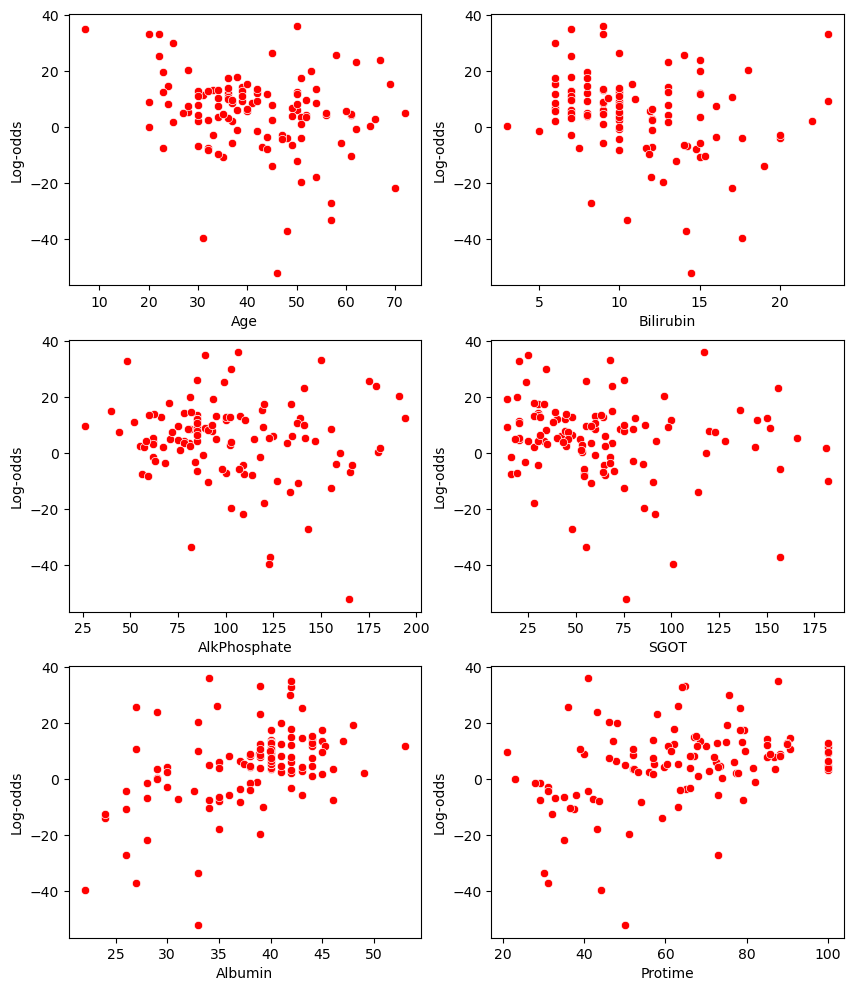

In [45]:
# Criando gráficos de dispersão para visualizar a relação entre o "preditor" vs "Valores Logit"
# para cada variável independente contínua:
# Definindo o estilo do gráfico:
plt.style.use(style='default')

# Definindo a figura onde serão plotados os gráficos:
plt.figure(figsize=(10, 12))

# "Loop for" para plotarmos os gráficos de dispersão:
for i, x_i in enumerate(continuous_var):
    # Cria o subplot:
    ax = plt.subplot(3, 2, i+1)

    # Plot do gráfico:
    sns.scatterplot(x=X_constant_v2[x_i].values, color='red', y=log_odds, ax=ax)

    # Definindo o título:
    ax.set_title(label = None, fontdict = {'fontsize': 16})

    # Definindo o label do eixo "x":
    ax.set_xlabel(xlabel = x_i, fontdict = {'fontsize': 10})

    # Definindo o label do eixo "y":
    ax.set_ylabel(ylabel = 'Log-odds', fontdict = {'fontsize': 10})

    # Definindo o tamanho dos labels dos ticks nos eixos "x" e "y":
    plt.tick_params(axis='x', which='major', labelsize=10)
    plt.tick_params(axis='y', which='major', labelsize=10)

# Ajustando os espaçamentos entre os gráficos nos subplots:
plt.subplots_adjust(wspace=None, hspace=None)

# Mostrando os gráficos:
plt.show()

# Fechando as instâncias da figura criada:
plt.close()

**Análise:** observe que os gráficos de dispersão confirman que **existe linearidade logit** para cada variável independente contínua, exceto para a variável **`SGOT`**.

### Resolvendo a *não linearidade* para a variável `SGOT`.

Neste caso, vamos transformá-la em uma **variável categórica ordinal**, primeiro realizando um diagnóstico dos exames, criando até 3 tipos de categorias (`low`, `normal` e `high`), e depois transformaremos estas 3 categorias em valores numéricos correspondentes: `1`, `3` e `7` respectivamente.

In [46]:
# Realizando um diagnóstico dos exames 'SGOT':
df_train['SGOT'] = pjlib.SGOT_test_diagnosis(data=df_train, results='SGOT')
# Contagem dos valores:
df_train['SGOT'].value_counts()

high      81
normal    41
low        0
Name: SGOT, dtype: int64

In [47]:
# Convertendo os diagnósticos para valores numéricos:
df_train['SGOT'] = pjlib.diagnosis_to_num(data=df_train, diagnosis='SGOT', num_values=[1, 3, 7])
# Contagem dos valores:
df_train['SGOT'].value_counts()

7    81
3    41
Name: SGOT, dtype: int64

Agora, vamos executar novamente a regressão logística com `statsmodel` para incluir os termo de interação (transformação logit) como parte do teste Box-Tidwell:

In [48]:
df_train_lt = df_train.copy(deep=True)  # lt = logit transform (transformação logit).

# Define as variáveis contínuas:
continuous_var = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']

# Adicionar os termos de interação com transformação logit (log natural)
# para as variáveis contínuas. Por exemplo: Age * Log(Age)
for var in continuous_var:
    df_train_lt[f'{var}:Log_{var}'] = df_train_lt[var].apply(lambda x: x * np.log(x)) # np.log = log natural.

# Mostra as primeiras observações:
df_train_lt.head()

,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,...,AlkPhosphate,SGOT,Albumin,Protime,Age:Log_Age,Bilirubin:Log_Bilirubin,AlkPhosphate:Log_AlkPhosphate,SGOT:Log_SGOT,Albumin:Log_Albumin,Protime:Log_Protime
0,0,0,0,1,0,0,1,1,0,1,...,123.0,7,27.0,31.00,185.817649,37.493462,591.898676,13.621371,88.987595,106.453603
1,1,0,0,0,1,1,1,0,0,1,...,78.0,3,44.0,85.00,142.878904,33.344342,339.823288,3.295837,166.504344,377.625357
2,1,1,0,1,0,0,0,0,0,0,...,150.0,7,39.0,64.71,59.914645,72.116367,751.595294,13.621371,142.878904,269.835248
3,1,1,0,0,1,1,1,1,0,1,...,30.0,3,40.0,76.00,119.896258,10.750557,102.035921,3.295837,147.555178,329.135734
4,1,1,1,1,0,1,1,1,0,1,...,175.0,7,27.0,36.00,235.505695,36.946803,903.837545,13.621371,88.987595,129.006682


In [49]:
# Manter as colunas relacionadas às variáveis contínuas:
cols_to_keep = continuous_var + df_train_lt.columns.tolist()[-len(continuous_var):]
print(f"cols_to_keep = {cols_to_keep}")

cols_to_keep = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime', 'Age:Log_Age', 'Bilirubin:Log_Bilirubin', 'AlkPhosphate:Log_AlkPhosphate', 'SGOT:Log_SGOT', 'Albumin:Log_Albumin', 'Protime:Log_Protime']


Portanto, com os termos de interação incluídos, podemos executar novamente a regressão logística e rever os resultados:

In [50]:
# Redefine as variáveis independentes para serem incluidos os termos de interação:
X_lt = df_train_lt[cols_to_keep]
y_lt = df_train_lt['Class']

# Adiciona uma constante:
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Constrói o modelo e ajusta (fit) os dados (utilizando statsmodel's Logit):
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Mostra um resumo dos resultados:
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  122
Model:                            GLM   Df Residuals:                      110
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.327
Date:                Fri, 11 Feb 2022   Deviance:                       64.655
Time:                        11:38:55   Pearson chi2:                     120.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Age           

**Análise:**

O que precisamos fazer é verificar a **significância estatística dos termos de interação** (por exemplo: `Age:Log_Age`) com base em seus **p-values**.

- O termo de interação `Age:Log_Age` tem um **p-value = 0.204**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Age` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `Bilirubin:Log_Bilirubin` tem um **p-value = 0.115**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Bilirubin` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `AlkPhosphate:Log_AlkPhosphate` tem um **p-value = 0.205**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `AlkPhosphate` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `SGOT:Log_SGOT` tem um **p-value = 0.823**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `SGOT` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `Albumin:Log_Albumin` tem um **p-value = 0.828**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Albumin` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita;

- O termo de interação `Protime:Log_Protime` tem um **p-value = 0.303**, ou seja, **não** é estatisticamente significante uma vez que  o p-value > 0.05). Portanto, a variável independente `Protime` está **linearmente relacionada** com o logit da variável de resultado (*Class*), ou seja, a premissa foi satisfeita.

Portanto, concluímos que esta premissa foi satisfeita para **todas as variáveis independentes contínuas**.

### Atualizando nos *data frames* a transformação feita na variável `SGOT`:

In [51]:
# Substituindo os valores no data frame "X_constant_v2":
X_constant_v2['SGOT'] = df_train['SGOT'].values
# Mostrando algumas observações:
X_constant_v2.head()

,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,const
0,0,0,1,0,0,1,1,0,1,0,0,0,1,48.0,14.15,123.0,7,27.0,31.00,1.0
1,0,0,0,1,1,1,0,0,1,1,1,1,0,39.0,13.00,78.0,3,44.0,85.00,1.0
2,1,0,1,0,0,0,0,0,0,0,1,1,0,20.0,23.00,150.0,7,39.0,64.71,1.0
3,1,0,0,1,1,1,1,0,1,1,1,1,0,34.0,6.00,30.0,3,40.0,76.00,1.0
4,1,1,1,0,1,1,1,0,1,0,1,1,0,58.0,14.00,175.0,7,27.0,36.00,1.0


In [52]:
# Substituindo os valores no data frame original "train_set['v2']":
train_set['v2']['SGOT'] = df_train['SGOT'].values
# Mostrando algumas observações:
train_set['v2'].head()

,Class,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Histology,Age,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime
0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,48.0,14.15,123.0,7,27.0,31.00
1,1,0,0,0,1,1,1,0,0,1,1,1,1,0,39.0,13.00,78.0,3,44.0,85.00
2,1,1,0,1,0,0,0,0,0,0,0,1,1,0,20.0,23.00,150.0,7,39.0,64.71
3,1,1,0,0,1,1,1,1,0,1,1,1,1,0,34.0,6.00,30.0,3,40.0,76.00
4,1,1,1,1,0,1,1,1,0,1,0,1,1,0,58.0,14.00,175.0,7,27.0,36.00


Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)** ou então retorne para **[3- Premissas para Regressão Logística](#premissas-LR)**.

___
<a name='premissa-multicolinearidade'></a>
## <font color='blue'>3.4- Premissa 4: Ausência de multicolinearidade</font>

A multicolinearidade corresponde a uma situação em que os dados contêm variáveis independentes altamente correlacionadas. Isto é um problema porque **reduz a precisão dos coeficientes estimados**, o que enfraquece o poder estatístico do modelo de regressão logística.

#### ***Como podemos checar?***

O **Fator de Inflação da Variância (VIF)** mede o grau de multicolinearidade em um conjunto de variáveis independentes.

Matematicamente, ele é **igual à razão entre a variância total do modelo e a variância de** um modelo que inclui apenas aquela única variável independente.

O menor valor possível para VIF é 1 (ou seja, uma ausência completa de colinearidade). Como regra geral, um **valor VIF que exceda 5 ou 10** indica uma quantidade problemática de multicolinearidade.

### Dados de treino: `v1`

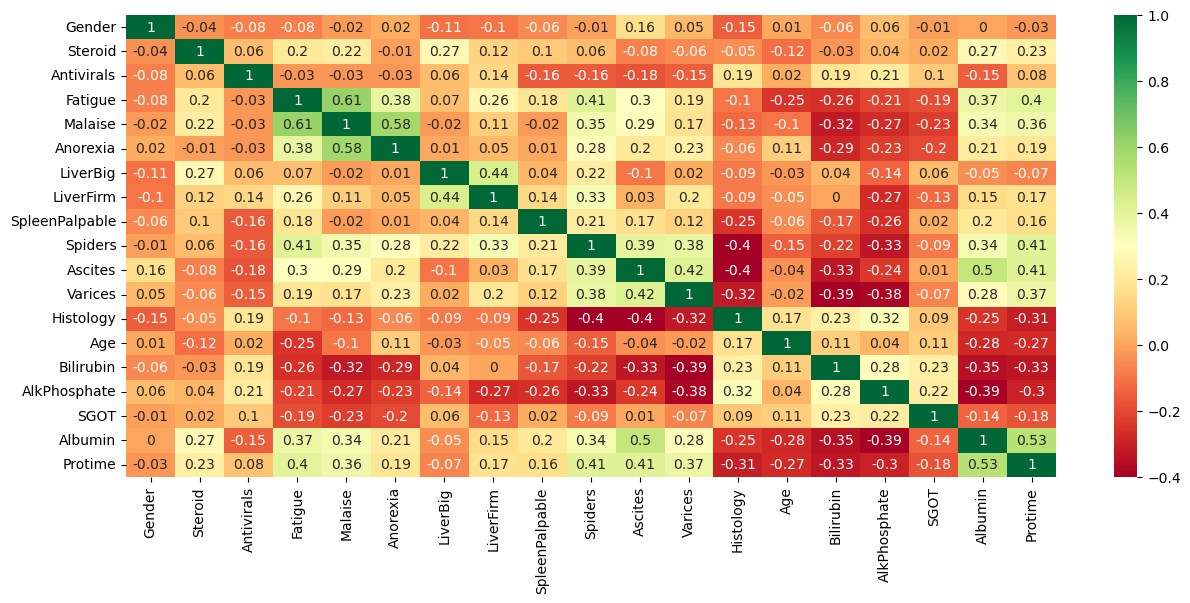

In [53]:
# Verificando a correlação entre as variáveis independentes:
# Definindo as variáveis independentes:
variables = X_constant_v1.columns.to_list()
variables.remove('const')
# Calculando a correlação entre as variáveis:
corrMatrix = np.round(X_constant_v1[variables].corr(), decimals=2)
# Definindo o estilo do gráfico:
plt.style.use(style='default')
# Plot:
plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

**Análise:**
- Podemos notar que a matriz de correlação pode ser difícil de ser interpretada quando há muitas variáveis independentes;
- Além disso, nem todos os problemas de colinearidade podem ser detectados pela inspeção da matriz de correlação: é possível que a colinearidade exista entre três ou mais variáveis, mesmo que nenhum par de variáveis tenha uma correlação particularmente alta;
- Portanto, em vez disso, usamos o **Fator de Inflação de Variância (VIF)**.

#### Variance Inflation Factor (VIF):

In [54]:
dslib.vif(data=X_constant_v1, variables=X_constant_v1.columns, const=True)

,variables,VIF
0,Gender,1.105235
1,Steroid,1.569712
2,Antivirals,1.286857
3,Fatigue,2.078259
4,Malaise,2.503129
5,Anorexia,1.783589
6,LiverBig,1.593753
7,LiverFirm,1.617265
8,SpleenPalpable,1.279020
9,Spiders,1.815119


**Análise:**
- O threshold para os valores **VIF** é geralmente igual a **5**, ou seja, valores acima de 5 significa que há presença de multicolinearidade entre as variáveis;
- Como todas as variáveis independentes têm valores **`VIF < 5`**, isso significa que não há multicolinearidade, e portanto esta **premissa foi satisfeita**.

### Dados de treino: `v2`

#### Variance Inflation Factor (VIF):

In [55]:
dslib.vif(data=X_constant_v2, variables=X_constant_v2.columns, const=True)

,variables,VIF
0,Gender,1.174821
1,Steroid,1.597130
2,Antivirals,1.329108
3,Fatigue,2.149177
4,Malaise,2.472547
5,Anorexia,1.760496
6,LiverBig,1.602752
7,LiverFirm,1.541063
8,SpleenPalpable,1.243569
9,Spiders,1.807946


**Análise:**
- O threshold para os valores **VIF** é geralmente igual a **5**, ou seja, valores acima de 5 significa que há presença de multicolinearidade entre as variáveis;
- Como todas as variáveis independentes têm valores **`VIF < 5`**, isso significa que não há multicolinearidade, e portanto esta **premissa foi satisfeita**.

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)** ou então retorne para **[3- Premissas para Regressão Logística](#premissas-LR)**.

___
<a name='premissa-independencia'></a>
## <font color='blue'>3.5- Premissa 5: Independência de observações</font>

As observações devem ser **independentes** umas das outras, ou seja, não devem vir de dados repetidos ou emparelhados. Isto significa que cada observação não é influenciada ou relacionada com o resto das observações.

#### ***Como podemos checar?***

Esta premissa de independência é **automaticamente** atendida para o nosso conjunto de dados, uma vez que os dados consistem em registros individuais de pacientes que contrairam a hepatite.

Esta premissa seria mais preocupante quando lidamos com dados de séries temporais, onde a correlação entre observações sequenciais (auto-correlação) pode ser um problema.

No entanto, ainda há maneiras de verificar a independência das observações para dados que não sejam de séries temporais. Nesses casos, a `variável de tempo` é a ordem das observações (ou seja, números de índice).

Em particular, podemos criar o **gráfico de Séries Residuais** onde plotamos os desvios residuais do modelo logit em relação aos números de índice das observações.

### Dados de treino: `v1`

In [56]:
# Setup do modelo de regressão logística (usando o método GLM para que possamos recuperar os resíduos)
logit_model = GLM(y_v1, X_constant_v1, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  122
Model:                            GLM   Df Residuals:                      102
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17.225
Date:                Fri, 11 Feb 2022   Deviance:                       34.450
Time:                        11:38:57   Pearson chi2:                     31.6
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5190
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender            27.2307   1.24e+04      0.

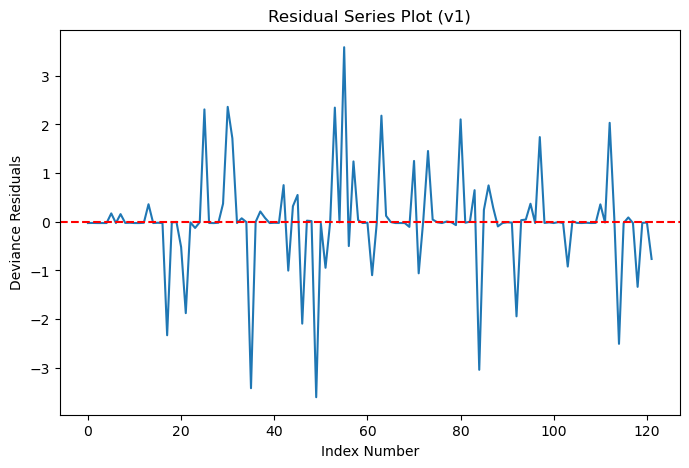

In [57]:
# Gerar gráfico de séries residuais:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot (v1)",
                    xlabel="Index Number", ylabel="Deviance Residuals")

# ax.plot(X.index.tolist(), stats.zscore(logit_results.resid_pearson))
ax.plot(X_constant_v1.index.tolist(), stats.zscore(logit_results.resid_deviance))
plt.axhline(y=0, ls="--", color='red');

**Análise:** como os resíduos, no gráfico acima, parecem estar espalhados aleatoriamente em torno da linha central (tracejada em vermelho), podemos inferir (visualmente) que a **premissa de independência de erros foi satisfeita**.

### Dados de treino: `v2`

In [58]:
# Setup do modelo de regressão logística (usando o método GLM para que possamos recuperar os resíduos)
logit_model = GLM(y_v2, X_constant_v2, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                  122
Model:                            GLM   Df Residuals:                      102
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.550
Date:                Fri, 11 Feb 2022   Deviance:                       29.099
Time:                        11:38:57   Pearson chi2:                     56.3
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5397
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Gender            27.6860   1.34e+04      0.

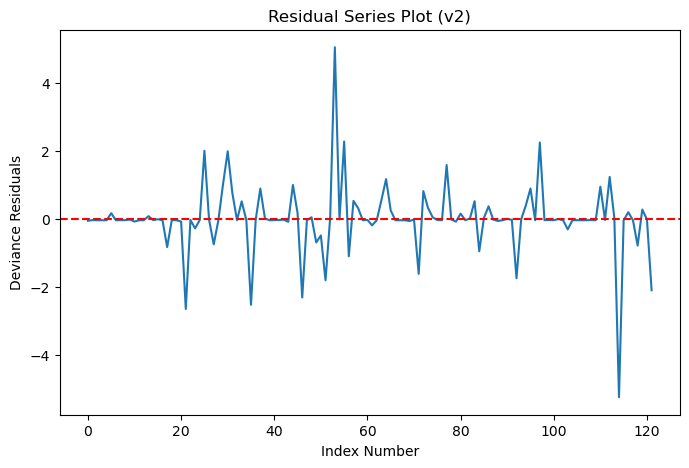

In [59]:
# Gerar gráfico de séries residuais:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot (v2)",
                    xlabel="Index Number", ylabel="Deviance Residuals")

# ax.plot(X.index.tolist(), stats.zscore(logit_results.resid_pearson))
ax.plot(X_constant_v2.index.tolist(), stats.zscore(logit_results.resid_deviance))
plt.axhline(y=0, ls="--", color='red');

**Análise:** como os resíduos, no gráfico acima, parecem estar espalhados aleatoriamente em torno da linha central (tracejada em vermelho), podemos inferir (visualmente) que a **premissa de independência de erros foi satisfeita**.

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)** ou então retorne para **[3- Premissas para Regressão Logística](#premissas-LR)**.

___
<a name='premissa-tamanho'></a>
## <font color='blue'>3.6- Premissa 6: Tamanho do *data set* (amostra) suficientemente grande</font>

Deve haver um número adequado de observações para cada variável independente no conjunto de dados para evitar a criação de um modelo de sobreajuste (*overfitting**).

#### ***Como podemos checar?***

Assim como a distância de Cook, há muitas opiniões sobre a regra geral para determinar uma quantidade *suficientemente grande*.

Uma regra geral é que deve haver pelo menos **10 observações com o resultado menos frequente** para cada variável categórica independente. Podemos verificar isso recuperando as *contagens de valor* para cada variável categórica.

Outra maneira de determinar um tamanho de amostra grande é que o **número total de observações deve ser maior do que [500](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6422534/)**. Podemos verificar isto obtendo o comprimento de todo o *data frame*.

### Dados de treino: `v1`

In [60]:
# Verificar o número total de observações:
len(X_constant_v1)

122

In [61]:
# Obter a contagem de valores para variáveis independentes (principalmente com foco em variáveis categóricas):
# Definindo as variáveis categóricas independentes:
cat_variables = ['Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm',
                 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
# Loop para fazermos a contagem de cada variável:
for col in cat_variables:
    print(X_constant_v1[col].value_counts())

0    106
1     16
Name: Gender, dtype: int64
0    62
1    60
Name: Steroid, dtype: int64
1    101
0     21
Name: Antivirals, dtype: int64
0    79
1    43
Name: Fatigue, dtype: int64
1    72
0    50
Name: Malaise, dtype: int64
1    96
0    26
Name: Anorexia, dtype: int64
1    104
0     18
Name: LiverBig, dtype: int64
1    76
0    46
Name: LiverFirm, dtype: int64
1    99
0    23
Name: SpleenPalpable, dtype: int64
1    78
0    44
Name: Spiders, dtype: int64
1    105
0     17
Name: Ascites, dtype: int64
1    110
0     12
Name: Varices, dtype: int64
0    68
1    54
Name: Histology, dtype: int64


**Análise:**
- A regra geral é termos pelo menos **entre 10 e 20 instâncias do resultado menos frequente** para cada variável preditora categórica em seu modelo. Portanto, a partir das contagens de valores acima, podemos ver que esta **premissa foi satisfeita**;

- Outra regra geral é termos pelo menos 500 observações em todo o conjunto de dados. Portanto, no total, temos **<font color='red'>apenas 122 observações</font>**, ou seja, temos um conjunto de dados muito pequeno e, desse modo esta **<font color='red'>premissa não foi satisfeita</font>**.

### Dados de treino: `v2`

In [62]:
# Verificar o número total de observações:
len(X_constant_v2)

122

In [63]:
# Obter a contagem de valores para variáveis independentes (principalmente com foco em variáveis categóricas):
# Definindo as variáveis categóricas independentes:
cat_variables = ['Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm',
                 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology', 'SGOT']
# Loop para fazermos a contagem de cada variável:
for col in cat_variables:
    print(X_constant_v2[col].value_counts())

0    106
1     16
Name: Gender, dtype: int64
0    62
1    60
Name: Steroid, dtype: int64
1    101
0     21
Name: Antivirals, dtype: int64
0    79
1    43
Name: Fatigue, dtype: int64
1    72
0    50
Name: Malaise, dtype: int64
1    96
0    26
Name: Anorexia, dtype: int64
1    104
0     18
Name: LiverBig, dtype: int64
1    76
0    46
Name: LiverFirm, dtype: int64
1    99
0    23
Name: SpleenPalpable, dtype: int64
1    78
0    44
Name: Spiders, dtype: int64
1    105
0     17
Name: Ascites, dtype: int64
1    110
0     12
Name: Varices, dtype: int64
0    68
1    54
Name: Histology, dtype: int64
7    81
3    41
Name: SGOT, dtype: int64


**Análise:**
- A regra geral é termos pelo menos **entre 10 e 20 instâncias do resultado menos frequente** para cada variável preditora categórica em seu modelo. Portanto, a partir das contagens de valores acima, podemos ver que esta **premissa foi satisfeita**;

- Outra regra geral é termos pelo menos 500 observações em todo o conjunto de dados. Portanto, no total, temos **<font color='red'>apenas 122 observações</font>**, ou seja, temos um conjunto de dados muito pequeno e, desse modo esta **<font color='red'>premissa não foi satisfeita</font>**.

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)**.

___
<a name='modelos-treinar-avaliar'></a>
## <font color='blue'>4- Treinar e Avaliar os modelos preditivos</font>

### Criando uma instância do algoritmo `LogisticRegression` com os hiperparâmetros padrão:

In [64]:
# Criando uma instância do classificador que será treinado a avaliado em cada versão:
clf = LogisticRegression(random_state=SEED)
# Label do modelo:
model_label = 'LR'

### Criando um dicionário para armazenar os `modelos` treinados e avaliados em cada `versão`:

In [65]:
# Criando um dicionário (objeto) para armazenar os "modelos" preditivos treinados e avaliados de cada versão:
models = {}

### Definindo as variáveis preditoras `categóricas`, `numéricas` e a variável `target`:

In [66]:
# Definindo a variável "target" (Class):
target_variable = 'Class'
# Definindo as variáveis categóricas preditoras para os dados de treino "v1":
cat_variables_v1 = ['Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm',
                    'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
# Definindo as variáveis numéricas preditoras para os dados de treino "v1":
num_variables_v1 = ['Age', 'Bilirubin', 'AlkPhosphate', 'SGOT', 'Albumin', 'Protime']

# Definindo as variáveis categóricas preditoras para os dados de treino "v2":
cat_variables_v2 = ['Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm',
                    'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Histology', 'SGOT']
# Definindo as variáveis numéricas preditoras para os dados de treino "v2":
num_variables_v2 = ['Age', 'Bilirubin', 'AlkPhosphate', 'Albumin', 'Protime']

### Criando um dicionário para armazenar as `features` que serão utilizadas em cada versão: 

In [67]:
# Variáveis preditoras:
features = {}

### Criando um dicionário para armazerarmos o `scaler` aplicado aos dados de `treino`e `teste` em cada versão:

In [68]:
# Scaler:
scaler = {}

### Definindo um *dataframe* para armazenar as métricas de `treino` e `teste`:

In [69]:
# Métricas nos dados de treino:
train_mtcs = {}
# Métricas nos dados de teste:
test_mtcs = {}

In [70]:
# Criando o dataframe para armazenar as métricas de cada versão:
metrics = pd.DataFrame(columns=['Version', 'Model', 'Data set', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1_score'])
metrics

,Version,Model,Data set,AUC,Accuracy,Precision,Recall,F1_score


In [71]:
# Criando o dataframe para armazenar as métricas da melhor versão de cada algoritmo:
models_best_metrics = dslib.pickle_object_load(path=ML_PATH, file="models_best_metrics.pkl")

### Definindo as `versões` dos modelo preditivos que serão treinados e avaliados:

In [72]:
# Definindo um dicionário dos modelos que serão criados com os parâmetros de cada versão:
models_version = {
    'v01':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':None,'balance':False,'random_state':None},
    'v02':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':StandardScaler(),'balance':False,'random_state':None},
    'v03':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':MinMaxScaler(),'balance':False,'random_state':None},
    'v04':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':RobustScaler(),'balance':False,'random_state':None},
    'v05':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':None,'balance':True,'random_state':SEED},
    'v06':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':StandardScaler(),'balance':True,'random_state':SEED},
    'v07':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':MinMaxScaler(),'balance':True,'random_state':SEED},
    'v08':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':RobustScaler(),'balance':True,'random_state':SEED},
    'v09':{'train_set':'v2','cat_variables':cat_variables_v2, 'num_variables':num_variables_v2,'scaler':None,'balance':False,'random_state':None},
    'v10':{'train_set':'v2','cat_variables':cat_variables_v2, 'num_variables':num_variables_v2,'scaler':StandardScaler(),'balance':False,'random_state':None},
    'v11':{'train_set':'v2','cat_variables':cat_variables_v2, 'num_variables':num_variables_v2,'scaler':MinMaxScaler(),'balance':False,'random_state':None},
    'v12':{'train_set':'v2','cat_variables':cat_variables_v2, 'num_variables':num_variables_v2,'scaler':RobustScaler(),'balance':False,'random_state':None},
    'v13':{'train_set':'v2','cat_variables':cat_variables_v2, 'num_variables':num_variables_v2,'scaler':None,'balance':True,'random_state':SEED},
    'v14':{'train_set':'v2','cat_variables':cat_variables_v2, 'num_variables':num_variables_v2,'scaler':StandardScaler(),'balance':True,'random_state':SEED},
    'v15':{'train_set':'v2','cat_variables':cat_variables_v2, 'num_variables':num_variables_v2,'scaler':MinMaxScaler(),'balance':True,'random_state':SEED},
    'v16':{'train_set':'v2','cat_variables':cat_variables_v2, 'num_variables':num_variables_v2,'scaler':RobustScaler(),'balance':True,'random_state':SEED}
}

### Treinando a avaliando cada `versão` do modelo preditivo:

In [73]:
# Inicia o treinamento e avaliação de cada modelo:
ept.start(msg="Iniciando o treinamento e avaliação de cada versão do modelo...")
# Loop para treinar e avaliar cada versão do modelo:
for v, p in models_version.items():
    # Preparando os dados de "treino" (X_train e y_train) e "teste" (X_test e y_test):
    X_train, y_train, X_test, y_test, scaler[v] = mllib.prepare_train_test_data(
    train_set=train_set[p['train_set']], test_set=test_set, target=target_variable, cat_features=p['cat_variables'],
    num_features=p['num_variables'], scaler=p['scaler'], balance=p['balance'], random_state=p['random_state'], verbose=False
    )
    # Treinando e avaliando a versão do modelo preditivo:
    models[v], train_mtcs, test_mtcs = mllib.train_validate_binary_clf_model(
        classifier=clf, X_train=X_train, y_train=y_train, X_valid=X_test, y_valid=y_test, 
        probability=True, threshold=THRESHOLD, verbose=False
    )
    # Salvando as variáveis preditoras:
    features[v] = p['cat_variables']+p['num_variables']
    # Salvando as métricas dos dados de treino:
    metrics = metrics.append(
        pd.DataFrame(
            data=[{'Version':v, 'Model':model_label,'Data set':'train','AUC':train_mtcs['auc'],'Accuracy':train_mtcs['accuracy'],
                   'Precision':train_mtcs['precision'],'Recall':train_mtcs['recall'],'F1_score':train_mtcs['f1_score']}]
        ),
        ignore_index=True
    )
    # Salvando as métricas dos dados de teste:
    metrics = metrics.append(
        pd.DataFrame(
            data=[{'Version':v,'Model':model_label,'Data set':'test','AUC':test_mtcs['auc'],'Accuracy':test_mtcs['accuracy'],
                   'Precision':test_mtcs['precision'],'Recall':test_mtcs['recall'],'F1_score':test_mtcs['f1_score']}]
        ),
        ignore_index=True
    )

# Fim do treinamento e avaliação:
ept.end(msg="Tempo gasto:")
print("\nWe trained and evaluated {} predictive models!".format(len(models_version)))

Iniciando o treinamento e avaliação de cada versão do modelo...
Tempo gasto: 0.47 seconds.

We trained and evaluated 16 predictive models!


### Análise das métricas nos dados de `teste`:

In [74]:
# Verificando os modelos com "AUC >= 90%":
metrics.query("`Data set`=='test' and AUC>=0.9").sort_values(by='AUC', ascending=False, ignore_index=True)

,Version,Model,Data set,AUC,Accuracy,Precision,Recall,F1_score
0,v01,LR,test,0.9400,0.8065,0.8800,0.88,0.8800
1,v08,LR,test,0.9400,0.8387,0.9545,0.84,0.8936
2,v06,LR,test,0.9333,0.8387,0.9545,0.84,0.8936
3,v02,LR,test,0.9267,0.8065,0.8800,0.88,0.8800
4,v04,LR,test,0.9267,0.8065,0.8800,0.88,0.8800
5,v05,LR,test,0.9267,0.8387,0.9167,0.88,0.8980
6,v13,LR,test,0.9133,0.8387,0.9167,0.88,0.8980
7,v03,LR,test,0.9067,0.8387,0.8846,0.92,0.9020


In [75]:
# Verificando as métricas de treino e teste das versões "v01" e "v08":
metrics.query("Version=='v01' or Version=='v08'").reset_index(drop=True)

,Version,Model,Data set,AUC,Accuracy,Precision,Recall,F1_score
0,v01,LR,train,0.9588,0.9180,0.9394,0.9588,0.9490
1,v01,LR,test,0.9400,0.8065,0.8800,0.8800,0.8800
2,v08,LR,train,0.9744,0.9124,0.8922,0.9381,0.9146
3,v08,LR,test,0.9400,0.8387,0.9545,0.8400,0.8936


**Análise:** as versões **`v01`** e **`v08`** apresentaram um ótimo desempenho e foram selecionadas para a próxima etapa.

Portanto, agora vamos trabalhar, nas duas versões, com a **seleção de variáveis importantes** para tentarmos construir um modelo **menos complexo**.

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)**.

___
<a name='modelos-selecao-variaveis'></a>
## <font color='blue'>5- Trabalhando com `seleção de variáveis` nos melhores modelos preditivos</font>

In [76]:
# Definindo um dicionário dos modelos que serão criados com os parâmetros de cada versão:
models_version = {
    'v17':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':None,'balance':False,'random_state':None},
    'v18':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':RobustScaler(),'balance':True,'random_state':SEED}
}

In [77]:
# Criando uma instância do classificador que será treinado a avaliado em cada versão:
clf = LogisticRegression(max_iter=1000, random_state=SEED)

# Inicia o treinamento e avaliação de cada modelo:
ept.start(msg="Iniciando o treinamento e avaliação com seleção de variáveis...\n")
# Loop para treinar e avaliar cada versão do modelo:
for v, p in models_version.items():
    # Preparando os dados de "treino" (X_train e y_train) e "teste" (X_test e y_test):
    X_train, y_train, X_test, y_test, scaler[v] = mllib.prepare_train_test_data(
    train_set=train_set[p['train_set']], test_set=test_set, target=target_variable, cat_features=p['cat_variables'],
    num_features=p['num_variables'], scaler=p['scaler'], balance=p['balance'], random_state=p['random_state'], verbose=False
    )
    # Treinando e avaliando a versão do modelo preditivo:
    models[v], train_mtcs, test_mtcs = mllib.train_validate_binary_clf_model(
        classifier=RFECV(estimator=clf, step=1, cv=NUM_FOLDS, scoring='roc_auc', n_jobs=-1),
        X_train=X_train, y_train=y_train, X_valid=X_test, y_valid=y_test, threshold=THRESHOLD, verbose=False
    )
    
    # Visualizando as features selecionadas:
    print("Version: {}".format(v))
    print("Selected features: {}".format(models[v].n_features_))
    print(list(models[v].get_feature_names_out(input_features=p['cat_variables']+p['num_variables'])))
    print() # pula 1 linha.
    
    # Salvando as variáveis preditoras:
    features[v] = list(models[v].get_feature_names_out(input_features=p['cat_variables']+p['num_variables']))
    # Salvando as métricas dos dados de treino:
    metrics = metrics.append(
        pd.DataFrame(
            data=[{'Version':v, 'Model':model_label,'Data set':'train','AUC':train_mtcs['auc'],'Accuracy':train_mtcs['accuracy'],
                   'Precision':train_mtcs['precision'],'Recall':train_mtcs['recall'],'F1_score':train_mtcs['f1_score']}]
        ),
        ignore_index=True
    )
    # Salvando as métricas dos dados de teste:
    metrics = metrics.append(
        pd.DataFrame(
            data=[{'Version':v,'Model':model_label,'Data set':'test','AUC':test_mtcs['auc'],'Accuracy':test_mtcs['accuracy'],
                   'Precision':test_mtcs['precision'],'Recall':test_mtcs['recall'],'F1_score':test_mtcs['f1_score']}]
        ),
        ignore_index=True
    )

# Fim do treinamento e avaliação:
ept.end(msg="Tempo gasto:")
print("\nWe trained and evaluated {} predictive models!".format(len(models_version)))

Iniciando o treinamento e avaliação com seleção de variáveis...

Version: v17
Selected features: 14
['Gender', 'Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'Spiders', 'Ascites', 'Varices', 'Histology', 'Bilirubin', 'Albumin', 'Protime']

Version: v18
Selected features: 9
['Gender', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig', 'LiverFirm', 'Spiders', 'Albumin', 'Protime']

Tempo gasto: 4.94 seconds.

We trained and evaluated 2 predictive models!


### Análise das métricas nos dados de `teste`:

In [78]:
# Verificando os modelos com "AUC >= 90%":
metrics.query("`Data set`=='test' and AUC>=0.9").sort_values(by='AUC', ascending=False, ignore_index=True)

,Version,Model,Data set,AUC,Accuracy,Precision,Recall,F1_score
0,v01,LR,test,0.9400,0.8065,0.8800,0.88,0.8800
1,v08,LR,test,0.9400,0.8387,0.9545,0.84,0.8936
2,v06,LR,test,0.9333,0.8387,0.9545,0.84,0.8936
3,v02,LR,test,0.9267,0.8065,0.8800,0.88,0.8800
4,v04,LR,test,0.9267,0.8065,0.8800,0.88,0.8800
5,v05,LR,test,0.9267,0.8387,0.9167,0.88,0.8980
6,v13,LR,test,0.9133,0.8387,0.9167,0.88,0.8980
7,v03,LR,test,0.9067,0.8387,0.8846,0.92,0.9020
8,v17,LR,test,0.9000,0.8387,0.8846,0.92,0.9020


**Análise:** podemos observar que a *seleção de variáveis* não melhorou o desempenho dos modelos, ou seja, as versões **`v01`** e **`v08`** continuam sendo os melhores modelos selecionados.

Portanto, agora vamos realizar a **otimização de hiperparâmetros** utilizando as mesmas premissas de cada versão com o objetivo de melhorarmos a métrica **AUC**.

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)**.

___
<a name='modelos-otimizacao-hiperparametros'></a>
## <font color='blue'>6- Trabalhando com `otimização de hiperparâmetros` nos melhores modelos preditivos</font>

In [79]:
# Definindo um dicionário dos modelos que serão criados com os parâmetros de cada versão:
models_version = {
    'v19':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':None,'balance':False,'random_state':None},
    'v20':{'train_set':'v1','cat_variables':cat_variables_v1, 'num_variables':num_variables_v1,'scaler':RobustScaler(),'balance':True,'random_state':SEED}
}

In [80]:
# Definindo o "grid""de parâmetros que serão testados no classificador:
param_grid = {
    "C":np.logspace(-3,3,7),
    "penalty":["l1","l2"],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [100, 300, 500, 1000]
}

# Criando uma instância do classificador:
clf = LogisticRegression(random_state = SEED)

### Treinando a avaliando cada `versão` do modelo preditivo:

In [81]:
# Inicia o treinamento e avaliação de cada modelo:
ept.start(msg="Iniciando o treinamento e avaliação com otimização de hiperparâmetros...\n")
# Loop para treinar e avaliar cada versão do modelo:
for v, p in models_version.items():
    # Preparando os dados de "treino" (X_train e y_train) e "teste" (X_test e y_test):
    X_train, y_train, X_test, y_test, scaler[v] = mllib.prepare_train_test_data(
    train_set=train_set[p['train_set']], test_set=test_set, target=target_variable, cat_features=p['cat_variables'],
    num_features=p['num_variables'], scaler=p['scaler'], balance=p['balance'], random_state=p['random_state'], verbose=False
    )
    # Realizando a otimização dos hiperparâmetros:
    gcv = GridSearchCV(
        estimator=clf, param_grid=param_grid, cv=NUM_FOLDS, scoring='roc_auc'
    ).fit(X_train, y_train)
    # Imprimindo os resultados:
    print("Version:", v)
    print("Best hyperparameters:{}".format(gcv.best_params_))
    print("Best AUC score:{}".format(gcv.best_score_))
    print()
    # Definindo os melhores hiperparâmetros do modelo:
    params = gcv.best_params_
    
    # Treinando e avaliando a versão do modelo preditivo com os melhores hiperparâmetros:
    models[v], train_mtcs, test_mtcs = mllib.train_validate_binary_clf_model(
        classifier=LogisticRegression(random_state = SEED, **params), X_train=X_train, y_train=y_train,
        X_valid=X_test, y_valid=y_test, probability=True, threshold=THRESHOLD, verbose=False
    )
    # Salvando as variáveis preditoras:
    features[v] = p['cat_variables']+p['num_variables']
    # Salvando as métricas dos dados de treino:
    metrics = metrics.append(
        pd.DataFrame(
            data=[{'Version':v,'Model':model_label,'Data set':'train','AUC':train_mtcs['auc'],'Accuracy':train_mtcs['accuracy'],
                   'Precision':train_mtcs['precision'],'Recall':train_mtcs['recall'],'F1_score':train_mtcs['f1_score']}]
        ),
        ignore_index=True
    )
    # Salvando as métricas dos dados de teste:
    metrics = metrics.append(
        pd.DataFrame(
            data=[{'Version':v,'Model':model_label,'Data set':'test','AUC':test_mtcs['auc'],'Accuracy':test_mtcs['accuracy'],
                   'Precision':test_mtcs['precision'],'Recall':test_mtcs['recall'],'F1_score':test_mtcs['f1_score']}]
        ),
        ignore_index=True
    )

# Fim do treinamento e avaliação:
ept.end(msg="Tempo gasto:")
print("\nWe trained and evaluated {} predictive models!".format(len(models_version)))

Iniciando o treinamento e avaliação com otimização de hiperparâmetros...

Version: v19
Best hyperparameters:{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best AUC score:0.8937037037037037

Version: v20
Best hyperparameters:{'C': 10.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best AUC score:0.9414444444444445

Tempo gasto: 34.39 seconds.

We trained and evaluated 2 predictive models!


### Análise das métricas nos dados de `teste`:

In [82]:
# Verificando os modelos com "AUC >= 90%":
metrics.query("`Data set`=='test' and AUC>=0.9").sort_values(by='AUC', ascending=False, ignore_index=True)

,Version,Model,Data set,AUC,Accuracy,Precision,Recall,F1_score
0,v01,LR,test,0.9400,0.8065,0.8800,0.88,0.8800
1,v08,LR,test,0.9400,0.8387,0.9545,0.84,0.8936
2,v19,LR,test,0.9400,0.8387,0.8846,0.92,0.9020
3,v06,LR,test,0.9333,0.8387,0.9545,0.84,0.8936
4,v02,LR,test,0.9267,0.8065,0.8800,0.88,0.8800
5,v04,LR,test,0.9267,0.8065,0.8800,0.88,0.8800
6,v05,LR,test,0.9267,0.8387,0.9167,0.88,0.8980
7,v13,LR,test,0.9133,0.8387,0.9167,0.88,0.8980
8,v03,LR,test,0.9067,0.8387,0.8846,0.92,0.9020
9,v17,LR,test,0.9000,0.8387,0.8846,0.92,0.9020


In [83]:
# Verificando as métricas de treino e teste das versões "v01" e "v08":
metrics.query("Version=='v08' or Version=='v19'").reset_index(drop=True)

,Version,Model,Data set,AUC,Accuracy,Precision,Recall,F1_score
0,v08,LR,train,0.9744,0.9124,0.8922,0.9381,0.9146
1,v08,LR,test,0.9400,0.8387,0.9545,0.8400,0.8936
2,v19,LR,train,0.9262,0.9344,0.9406,0.9794,0.9596
3,v19,LR,test,0.9400,0.8387,0.8846,0.9200,0.9020


**Análise:** podemos observar que a versão **`19`** apresentou os melhores resultados, ou seja, a **otimização de hiperparâmetros** melhorou o desempenho do modelo preditivo em relação a versão **`v01`**.

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)**.

___
<a name='modelos-conclusao'></a>
## <font color='blue'>7- Concluir e salvar o `melhor modelo preditivo` construído com a *Regressão Logística*</font>

Portanto, o modelo preditivo construido na versão **`v19`** obteve o melhor desempenho na métrica **`AUC`** e também nas outras métricas e por isso, ele foi escolhido como o **melhor modelo preditivo construído com a `Regressão Logística`**.

Este modelo foi contruido com as seguintes premissas:
* utilizamos a `versão 1` dos dados de treino, ou seja, **sem o tratamento de outliers univariados**;

* utilizamos **todas** as variáveis preditoras;

* não fizemos a padronização de escala nas variáveis numéricas;

* **NÃO** fizemos o **balanceamento** do *dataset* de treino, ou seja, não criamos registros sintéticos da classe minoritária (`target = 0`).

### Salvando *todas* as informações do melhor modelo de classificação com `Logistic Regression`:

In [84]:
# Melhor versão do modelo preditivo:
best_version = 'v19'
# Cria dataframes para salvar as melhores métricas de treino e teste:
best_train_mtcs = metrics.query("Version==@best_version and `Data set`=='train'").reset_index(drop=True)
best_test_mtcs = metrics.query("Version==@best_version and `Data set`=='test'").reset_index(drop=True)
# Remove a coluna 'Version':
best_train_mtcs.drop(columns='Version', inplace=True)
best_test_mtcs.drop(columns='Version', inplace=True)
# Salva as melhores métricas criadas com este algoritmo:
models_best_metrics = models_best_metrics.append(best_train_mtcs, ignore_index=True)
models_best_metrics = models_best_metrics.append(best_test_mtcs, ignore_index=True)
# Salva as variáveis preditoras, scaler e modelo da melhor versão:
best_model = {
    'variables': features[best_version],
    'scaler': scaler[best_version],
    'model': models[best_version]
}

In [85]:
# Salvando as métricas dos melhores modelos preditivos:
dslib.pickle_object_save (
    path=ML_PATH, file="models_best_metrics.pkl", object_name=models_best_metrics, msg=None)

In [86]:
# Salvando as informações do melhor modelo preditivo criado com o "Logistic Regression":
dslib.pickle_object_save (
    path=ML_PATH, file="lr_best_model.pkl", object_name=best_model, msg=None)

Para retornar ao ínicio deste **notebook** clique **[aqui](#notebook-header)**.

## <font color='black'>FIM</font>